# MATH 210 Introduction to Mathematical Computing

## March 23, 2016

Today's Agenda:

1. More about pandas DataFrames
    * Example: GDP per capita (World Bank Open Data)
    * Accessing rows and columns
    * More plotting  
2. DataFrame methods
    * Compute GDP growth using `.diff`
    * Find correlation coefficients using `.corr`
    * Examples: `.mean`, `.sort_values`, `.max`, `.min`
3. Exercises

In [1]:
import pandas as pd
%matplotlib inline

## 1. More about pandas DataFrames

Let's practice using pandas DataFrames:

* Import data with `pandas.read_csv`
* Get an overview of the data with the methods `.head()`, `.tail()` and `.info()`
* Access columns by name using brackets `[]` (columns are pandas 1-dimensional data structure Series)
* Access rows and columns by index labels using `.loc[row_label,col_label]`
* Do more plotting with `.plot()` with options `kind='bar'` and `kind='scatter'`

### World Bank Open Data: GDP per capita

The World Bank has a large amount of open data available online (see [World Bank Open Data](http://data.worldbank.org/)). I've downloaded a dataset describing the GDP per capita from 1960 to 2014 of 13 different countries and it comes with the following description:

> GDP per capita (current US$): GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.

Let's load the data with `pandas.read_csv` and take look. The first column is the year and so we use the option `index_col=0` to set the year as the index.

In [2]:
gdp_data = pd.read_csv("gdp_data.csv",index_col=0)

In [3]:
gdp_data.head()

,Canada,China,Mexico,United Kingdom,United States,India,Japan,Spain,Kenya,Ghana,Nigeria,Saudi Arabia,Singapore
Year,,,,,,,,,,,,,
1960,2294.568814,88.722498,342.016187,1380.306241,3007.123445,83.794684,478.995340,396.392253,97.621531,182.979246,92.811868,NaN,427.874822
1961,2231.293824,75.048915,359.290995,1452.544709,3066.562869,87.031166,563.586760,450.053289,94.835254,189.713215,96.811564,NaN,448.953324
1962,2255.230044,70.122082,374.445430,1513.651449,3243.843078,91.657911,633.640315,520.206131,100.604255,195.120016,104.194016,NaN,471.874354
1963,2354.839122,73.420392,403.824180,1592.614477,3374.515171,103.135871,717.866915,609.487384,104.012701,210.968978,107.329219,NaN,510.980519
1964,2529.518179,84.573397,463.896331,1729.399978,3573.941185,117.842826,835.657252,675.241639,108.558933,230.431292,112.933731,NaN,485.296925


In [4]:
gdp_data.tail()

,Canada,China,Mexico,United Kingdom,United States,India,Japan,Spain,Kenya,Ghana,Nigeria,Saudi Arabia,Singapore
Year,,,,,,,,,,,,,
2010,47463.631192,4514.940520,8851.350514,38292.871131,48374.056457,1387.880084,42909.234152,30737.832271,991.850545,1323.099141,2314.963537,18753.981233,46569.973049
2011,52086.533525,5574.187093,9715.112596,41020.376964,49781.357490,1471.658439,46203.709519,31832.238081,1012.879773,1587.190873,2514.148622,23256.095613,53121.231044
2012,52733.473689,6264.643878,9703.371017,41294.514801,51456.658728,1449.664875,46679.265432,28647.835243,1184.923256,1641.825922,2739.852189,24883.189715,54577.137365
2013,52305.258394,6991.853866,10172.722549,42309.039922,52980.043626,1455.102191,38633.708059,29370.663867,1257.202838,1827.101368,2979.834679,24646.020873,55979.757049
2014,50235.385509,7590.016441,10325.646066,46331.977410,54629.495168,1581.510703,36194.415613,29767.351560,1358.262219,1441.636453,3203.296824,24160.958545,56284.578405


In [5]:
gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1960 to 2014
Data columns (total 13 columns):
Canada            55 non-null float64
China             55 non-null float64
Mexico            55 non-null float64
United Kingdom    55 non-null float64
United States     55 non-null float64
India             55 non-null float64
Japan             55 non-null float64
Spain             55 non-null float64
Kenya             55 non-null float64
Ghana             55 non-null float64
Nigeria           55 non-null float64
Saudi Arabia      47 non-null float64
Singapore         55 non-null float64
dtypes: float64(13)
memory usage: 6.0 KB


### Accessing Rows and Columns

We see that Saudi Arabia is missing 8 years of data. We can access that column with brackets `[]` and the result is a pandas Series.

In [6]:
gdp_data['Saudi Arabia'].head(10)

Year
1960           NaN
1961           NaN
1962           NaN
1963           NaN
1964           NaN
1965           NaN
1966           NaN
1967           NaN
1968    776.975104
1969    800.795916
Name: Saudi Arabia, dtype: float64

We can access several columns by passing a list of column names into the brackets `[]`.

In [7]:
gdp_data[['Canada','China','Spain']].tail(10)

,Canada,China,Spain
Year,,,
2005,36028.232490,1740.096726,26510.717453
2006,40243.552284,2082.183363,28482.609483
2007,44328.475377,2673.294191,32709.401038
2008,46400.441846,3441.221355,35578.736190
2009,40764.141347,3800.474542,32333.466104
2010,47463.631192,4514.940520,30737.832271
2011,52086.533525,5574.187093,31832.238081
2012,52733.473689,6264.643878,28647.835243
2013,52305.258394,6991.853866,29370.663867


We can also access rows and columns by index label using `.loc[row_label,col_label]`.

In [8]:
gdp_data.loc[2014,'Singapore']

56284.578405336601

In [9]:
gdp_data.loc[2007:2010,['Canada','Kenya','India']]

,Canada,Kenya,India
Year,,,
2007,44328.475377,857.925689,1050.024801
2008,46400.441846,938.571762,1022.577592
2009,40764.141347,942.743146,1124.519446
2010,47463.631192,991.850545,1387.880084


### More Plotting

Let's compare the GDP per capita of countries in different regions of the world by selecting and then plotting the data.

**Example.** Plot the GDP per capita of China, Japan and Singapore over the period 1960 tp 1980.

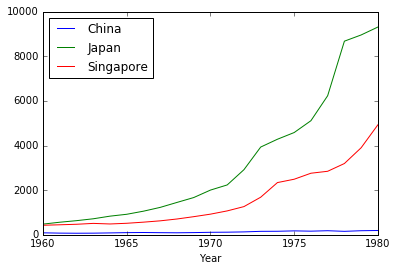

In [10]:
gdp_data.loc[1960:1980,['China','Japan','Singapore']].plot()

**Example.** Plot the GDP per capita of Canada, United States and Mexico over the period 1990 to 2000.

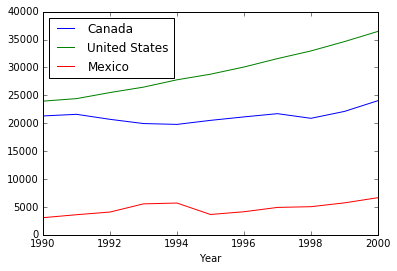

In [11]:
gdp_data.loc[1990:2000,['Canada','United States','Mexico']].plot()

**Example.** Plot the GDP per capita in 2014 of all 13 countries as a bar plot.

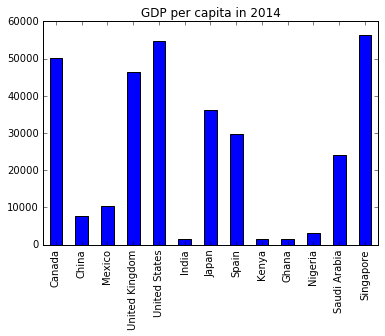

In [12]:
gdp_data.loc[2014].plot(kind='bar',title='GDP per capita in 2014')

Which of these 13 countries had the highest GDP per capita in 2014? Singapore!

## 2. DataFrame Methods

We can do operations on DataFrames using methods such as `.sum()`, `.mean()`, `.diff()` (the difference between adjacent values), `.corr()` (the correlation coefficients column by column).

### Computing GDP Growth (%)

To compute GDP growth (as percent per capita), we can use the `.diff()` method to find the change in GDP per capita year by year and then divide by the GDP to get the percent change.

In [13]:
gdp_growth = gdp_data.diff() / gdp_data

In [14]:
gdp_growth.tail()

,Canada,China,Mexico,United Kingdom,United States,India,Japan,Spain,Kenya,Ghana,Nigeria,Saudi Arabia,Singapore
Year,,,,,,,,,,,,,
2010,0.141150,0.158245,0.135987,0.029420,0.028373,0.189757,0.083586,-0.051911,0.049511,0.172017,0.528300,0.165239,0.171626
2011,0.088754,0.190027,0.088909,0.066491,0.028270,0.056928,0.071303,0.034380,0.020762,0.166389,0.079226,0.193589,0.123327
2012,0.012268,0.110215,-0.001210,0.006639,0.032558,-0.015171,0.010188,-0.111157,0.145194,0.033277,0.082378,0.065389,0.026676
2013,-0.008187,0.104008,0.046138,0.023979,0.028754,0.003737,-0.208252,0.024611,0.057492,0.101404,0.080536,-0.009623,0.025056
2014,-0.041203,0.078809,0.014810,0.086829,0.030193,0.079929,-0.067394,0.013326,0.074403,-0.267380,0.069760,-0.020076,0.005416


**Example.** Plot GDP growth of China, Singapore and Canada since 2000.

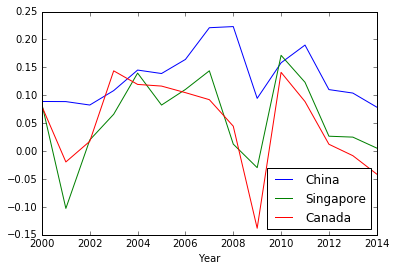

In [15]:
gdp_growth.loc[2000:,['China','Singapore','Canada']].plot()

We can see that all 3 countries had slower (or negative growth) during the global financial crisis in 2008 and 2009.

**Example.** Plot GDP growth of Canada and the United States.

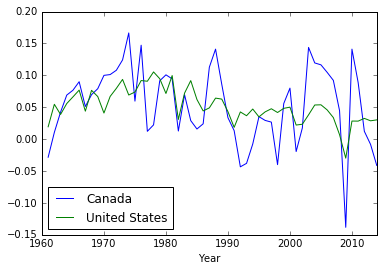

In [16]:
gdp_growth[['Canada','United States']].plot()

**Example.** Plot GDP growth of Canada and the United States as a scatter plot. Is there a correlation?

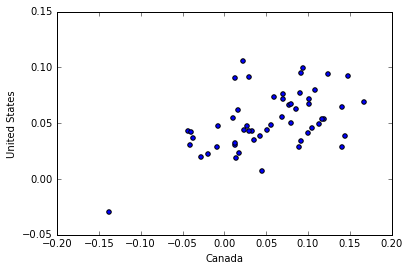

In [17]:
gdp_growth[['Canada','United States']].plot(x='Canada',y='United States',kind='scatter')

### Computing Correlation Coefficients

The `.corr` method computes the correlation coefficient for every pair of columns. Let's see which countries GDP growth are correlated.

In [18]:
gdp_corr = gdp_growth.corr()
gdp_corr

,Canada,China,Mexico,United Kingdom,United States,India,Japan,Spain,Kenya,Ghana,Nigeria,Saudi Arabia,Singapore
Canada,1.000000,0.111384,0.296198,0.408056,0.509288,0.207439,0.276663,0.347441,0.253780,0.233107,0.448914,0.631696,0.589560
China,0.111384,1.000000,-0.044511,-0.029256,-0.184294,0.169740,-0.330956,-0.081576,0.242251,0.248313,0.274129,0.110947,0.056095
Mexico,0.296198,-0.044511,1.000000,0.189209,0.326804,-0.043288,-0.009456,-0.000733,-0.133443,-0.059262,0.163775,0.502015,0.303145
United Kingdom,0.408056,-0.029256,0.189209,1.000000,0.362502,0.292077,0.255077,0.738142,0.471523,0.274890,0.368383,0.313839,0.259827
United States,0.509288,-0.184294,0.326804,0.362502,1.000000,0.005081,0.378798,0.217160,0.131332,0.002128,0.039088,0.281704,0.362945
India,0.207439,0.169740,-0.043288,0.292077,0.005081,1.000000,0.028425,0.171779,0.337648,0.212299,0.308971,0.274674,0.148470
Japan,0.276663,-0.330956,-0.009456,0.255077,0.378798,0.028425,1.000000,0.378814,-0.018073,-0.023018,-0.084291,0.150911,0.345053
Spain,0.347441,-0.081576,-0.000733,0.738142,0.217160,0.171779,0.378814,1.000000,0.492380,0.359720,0.372048,0.350564,0.222869
Kenya,0.253780,0.242251,-0.133443,0.471523,0.131332,0.337648,-0.018073,0.492380,1.000000,0.361705,0.584038,0.341585,0.093838
Ghana,0.233107,0.248313,-0.059262,0.274890,0.002128,0.212299,-0.023018,0.359720,0.361705,1.000000,0.211047,0.210599,0.077020


**Example.** Which country's GDP growth is most corelated with Canada?

In [19]:
gdp_corr['Canada'].sort_values(ascending=False)

Canada            1.000000
Saudi Arabia      0.631696
Singapore         0.589560
United States     0.509288
Nigeria           0.448914
United Kingdom    0.408056
Spain             0.347441
Mexico            0.296198
Japan             0.276663
Kenya             0.253780
Ghana             0.233107
India             0.207439
China             0.111384
Name: Canada, dtype: float64

Saudi Arabia! Let's plot GDP growth of Saudi Arabia versus Canada as a scatter plot.

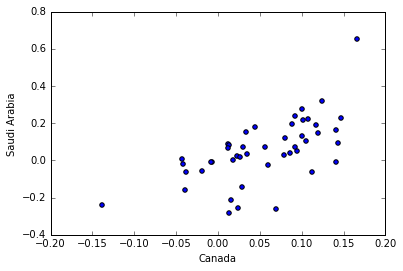

In [20]:
gdp_growth[['Canada','Saudi Arabia']].plot(x='Canada',y='Saudi Arabia',kind='scatter')

**Example.** Which two countries have the most correlated GDP growth? Spain and the United Kingdom.

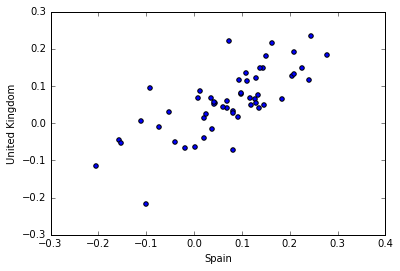

In [21]:
gdp_growth[['Spain','United Kingdom']].plot(x='Spain',y='United Kingdom',kind='scatter')

### More Examples

**Example.** Which country averaged the highest GDP growth per capita since 1990? China!

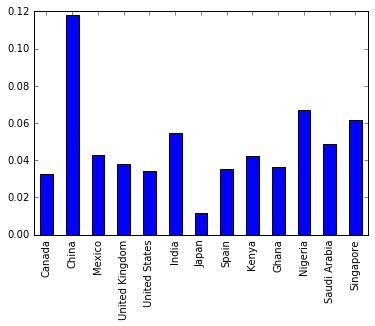

In [22]:
gdp_growth.loc[1990:,:].mean().plot(kind='bar')

**Example.** Which country has the highest GDP per capita in 2014? Singapore!

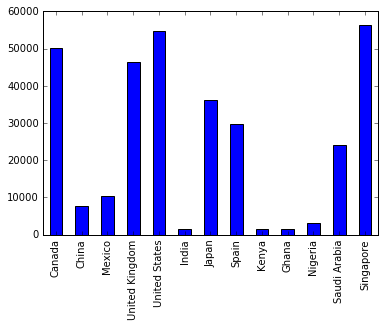

In [23]:
gdp_data.loc[2014,:].plot(kind='bar')

**Example.** Which country has the highest GDP per capita in 1990?

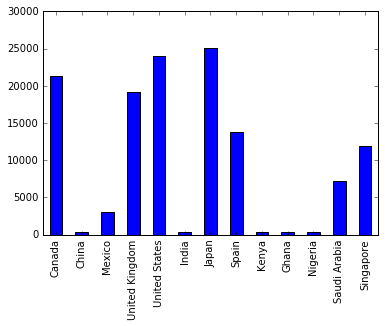

In [24]:
gdp_data.loc[1990,:].plot(kind='bar')

**Example.** Which country had the highest GDP growth in 2014? United Kingdom!

In [25]:
gdp_growth.loc[2014,:].sort_values(ascending=False)

United Kingdom    0.086829
India             0.079929
China             0.078809
Kenya             0.074403
Nigeria           0.069760
United States     0.030193
Mexico            0.014810
Spain             0.013326
Singapore         0.005416
Saudi Arabia     -0.020076
Canada           -0.041203
Japan            -0.067394
Ghana            -0.267380
Name: 2014, dtype: float64

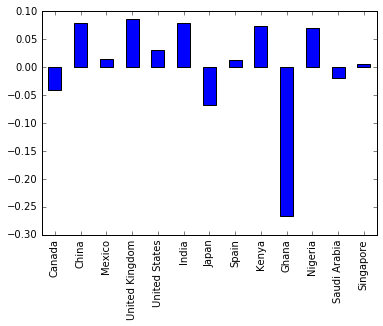

In [26]:
gdp_growth.loc[2014,:].plot(kind='bar')

## 3. Exercises

**Exercise.** Plot the GDP growth of India and China from 1965 to 1995.

**Exercise.** Plot the GDP growth of Nigeria versus Ghana as a scatter plot.

**Exercise.** The `.mean` method calculates the mean of every column in a DataFrame (or by row if the user chooses that option). Plot the average GDP growth since 2000 of every country in the dataset as a bar plot.

**Exercise.** The `.max` method computes the maximum of every column and the `.idxmax` finds the index of the maximum of every column. What country experienced the highest GDP growth rate in the dataset and in what year did that occur?

**Exercise.** The `.min` method computes the minimum of every column and the `.idxmin` finds the index of the minimum of every column. What country experienced the lowest GDP growth rate in the dataset and in what year did that occur?